# 2D TFIM: Inference

In this notebook, I loaded the trained models (2D Euclidean RNN, 1D hyperbolic GRU and 1D Euclidean GRU) to generate 50 samples whose local energies are calculated. 

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../utility')

In [3]:
def define_load_test(wf, weight_link):
    test_samples_before = wf.sample(50,2)
    test_gs_before = Ising2D_local_energies(Jz, Bx, Nx, Ny, test_samples_before, wf)
    gs_mean_b = np.mean(test_gs_before)
    gs_var_b = np.var(test_gs_before)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(50,2)
    test_gs_after =  Ising2D_local_energies(Jz, Bx, Nx, Ny, test_samples_after, wf)
    gs_mean_a = np.mean(test_gs_after)
    gs_var_a = np.var(test_gs_after)
    
    wf.model.summary()
    print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')

# Nx=5, Ny=5

In [4]:
Nx=5
Ny = 5
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = 50

## 1D EuclGRU

In [5]:
from tfim2d_1drnn_train_loop import *

2025-05-22 17:16:17.873445: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50)
wl_gru='results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -75.06439198687903, var E = 32.99192901588688


Model: "wf_model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_4 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -78.18993358048833, var E = 5.290571477464754


## 1D HypGRU

In [12]:
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -75.45158504785597, var E = 27.03285930030839


Model: "wf_model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -78.34028277823228, var E = 4.480787718442695


## 2D Euclidean RNN

In [17]:
from tfim2d_2drnn_train_loop import *
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='results/2DRNN_Nx=5_Ny=5_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, wl_2d)

Before loading weights, the ground state energy mean and variance are:
Mean E = -65.91479232446551, var E = 65.78982635838076


Model: "wf_model_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mdrn_ncell_1 (MDRNNcell)        │ ?                      │         5,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,352 (20.91 KB)

 Trainable params: 5,352 (20.91 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -78.67630796357297, var E = 0.3879416919927195


# Nx = 7, Ny = 7

In [7]:
Nx=7
Ny=7
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = 50

In [8]:
from tfim2d_1drnn_train_loop import *

2025-05-24 16:59:57.761900: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1D EuclGRU

In [8]:
from tfim2d_1drnn_train_loop import *
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50)
wl_gru='results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -148.0444336038352, var E = 53.724323257479035


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -153.3292918984072, var E = 14.428962970703767


## 1D HypGRU

In [9]:
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -148.96438481777963, var E = 51.56726151774202


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -154.45420110207945, var E = 7.054586688961784


## 2D Euclidean RNN

In [6]:
from tfim2d_2drnn_train_loop import *
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='results/2DRNN_Nx=7_Ny=7_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, wl_2d)

2025-05-16 16:32:14.620294: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Before loading weights, the ground state energy mean and variance are:
Mean E = -115.38955607102953, var E = 378.57260087630993


Model: "wf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mdrn_ncell (MDRNNcell)          │ ?                      │         5,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,352 (20.91 KB)

 Trainable params: 5,352 (20.91 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -154.64950050572332, var E = 0.44788903132084923


# Nx=8, Ny=8

In [16]:
Nx=8
Ny=8
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = 50

In [10]:
from tfim2d_1drnn_train_loop import *
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50, seed = 121)
wl_gru='results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -190.1137406739664, var E = 158.3196377804805


Model: "wf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -200.0870606199001, var E = 26.11995347440913


## 1D HypGRU

In [9]:
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50, seed = 121)
wl_hgru='results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -194.21110490645324, var E = 118.20535082231837


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_1 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -200.51929701188084, var E = 28.78307359160287


## 2D eRNN

In [20]:
from tfim2d_2drnn_train_loop import *
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='results/2DRNN_Nx=8_Ny=8_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, wl_2d)

Before loading weights, the ground state energy mean and variance are:
Mean E = -133.0442999313017, var E = 571.9436928937706


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mdrn_ncell (MDRNNcell)          │ ?                      │         5,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,352 (20.91 KB)

 Trainable params: 5,352 (20.91 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -202.37589154528908, var E = 1.0833696378144124


# Nx=9, Ny=9

In [9]:
Nx=9
Ny=9
Jz=np.ones((Nx,Ny))
Bx=3.0
ns = 50

## 1d EuclGRU

In [10]:
from tfim2d_1drnn_train_loop import *
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50)
wl_gru='results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

2025-05-25 15:23:45.665596: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Before loading weights, the ground state energy mean and variance are:
Mean E = -245.711968919578, var E = 128.13189107399327


Model: "wf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -255.41906853978261, var E = 28.418427918469956


In [11]:
from tfim2d_1drnn_train_loop import *
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50, seed = 151)
#1DRNN_Nx=9_Ny=9_o_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5
wl_gru='results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -247.54101881305618, var E = 74.21401740770237


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_1 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -253.9418189335997, var E = 35.73444044328689


In [12]:
from tfim2d_1drnn_train_loop import *
wf_gru = RNNwavefunction(Nx, Ny, 'EuclGRU', 50,121)
wl_gru='results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -238.75451102150072, var E = 160.89087285720407


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_2 (EuclGRU)            │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -252.752029728378, var E = 38.241983852257746


## 1d HypGRU

In [13]:
from tfim2d_1drnn_train_loop import *
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50)
wl_hgru='results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -246.4594066052653, var E = 116.57248328801428


Model: "wf_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -255.60198044552737, var E = 19.53830402243044


In [14]:
from tfim2d_1drnn_train_loop import *
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50, seed = 151)
wl_hgru='results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -238.57969700299455, var E = 231.55047982171865


Model: "wf_model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_1 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -254.27729845881885, var E = 30.42599876471446


In [15]:
from tfim2d_1drnn_train_loop import *
wf_hgru = RNNwavefunction_hyp(Nx,Ny, 'HypGRU', 'hyp', 'id', 50, seed = 121)
wl_hgru='results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_checkpoint.weights.h5'
define_load_test(wf_hgru,wl_hgru)

Before loading weights, the ground state energy mean and variance are:
Mean E = -242.74366755953062, var E = 111.83396956867583


Model: "wf_model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_2 (HypGRU)              │ ?                      │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,052 (31.45 KB)

 Trainable params: 8,052 (31.45 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -254.2367383616681, var E = 19.217536103125134


## 2d Euclidean RNN

In [8]:
from tfim2d_2drnn_train_loop import *
wf_2drnn=RNNwavefunction(Nx,Ny, 50, 2)
wl_2d='results/2DRNN_Nx=9_Ny=9_u=50_ns50_checkpoint.weights.h5'
define_load_test(wf_2drnn, wl_2d)

Before loading weights, the ground state energy mean and variance are:
Mean E = -166.0107219741789, var E = 809.6601594573675


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mdrn_ncell (MDRNNcell)          │ ?                      │         5,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense (Dense)                │ (50, 2)                │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,352 (20.91 KB)

 Trainable params: 5,352 (20.91 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = -256.7025874849803, var E = 0.8811306833156415


# Plot convergence curves

In [2]:
#(5,5)
E_55 = -78.68568
mE_egru_55 = np.load('results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_meanE.npy')
mE_hgru_55 = np.load('results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_55 = np.load('results/2DRNN_Nx=5_Ny=5_u=50_ns50_meanE.npy')
vE_egru_55 = np.load('results/1DRNN_Nx=5_Ny=5_EuclGRU_50_ns50_varE.npy')
vE_hgru_55 = np.load('results/1DRNN_Nx=5_Ny=5_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_55 = np.load('results/2DRNN_Nx=5_Ny=5_u=50_ns50_varE.npy')

#(7,7)
E_77 = -154.84631
mE_egru_77 = np.load('results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_meanE.npy')
mE_hgru_77 = np.load('results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_77 = np.load('results/2DRNN_Nx=7_Ny=7_u=50_ns50_meanE.npy')
vE_egru_77 = np.load('results/1DRNN_Nx=7_Ny=7_EuclGRU_50_ns50_varE.npy')
vE_hgru_77 = np.load('results/1DRNN_Nx=7_Ny=7_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_77 = np.load('results/2DRNN_Nx=7_Ny=7_u=50_ns50_varE.npy')

#(8,8)
E_88 = -202.5077381
mE_egru_88 = np.load('results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_meanE.npy')
mE_hgru_88 = np.load('results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_88 = np.load('results/2DRNN_Nx=8_Ny=8_u=50_ns50_meanE.npy')
vE_egru_88 = np.load('results/1DRNN_Nx=8_Ny=8_EuclGRU_50_ns50_varE.npy')
vE_hgru_88 = np.load('results/1DRNN_Nx=8_Ny=8_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_88 = np.load('results/2DRNN_Nx=8_Ny=8_u=50_ns50_varE.npy')

#(9,9)
E_99 = -256.55348
mE_egru_99 = np.load('results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_meanE.npy')
mE_hgru_99 = np.load('results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_meanE.npy')
mE_e2gru_99 = np.load('results/2DRNN_Nx=9_Ny=9_u=50_ns50_meanE.npy')
vE_egru_99 = np.load('results/1DRNN_Nx=9_Ny=9_EuclGRU_50_ns50_varE.npy')
vE_hgru_99 = np.load('results/1DRNN_Nx=9_Ny=9_HypGRU_50_hyp_id_ns50_varE.npy')
vE_e2gru_99 = np.load('results/2DRNN_Nx=9_Ny=9_u=50_ns50_varE.npy')

In [4]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_res_meanE(ax, Ee, e_list, e_names, N, frange, legend_loc):
    ax.plot(np.arange(len(e_list[0])), e_list[0],color = 'blue', label = e_names[0])
    ax.plot(np.arange(len(e_list[1])), e_list[1], color = 'cyan',label = e_names[1])
    ax.plot(np.arange(len(e_list[2])), e_list[2], color = 'green', label = e_names[2])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"$N_x$={N[0]}, $N_y$ = {N[1]}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(np.arange(len(e_list[0])), e_list[0],color = 'blue', label = e_names[0])
    ax2.plot(np.arange(len(e_list[1])), e_list[1], color = 'cyan',label = e_names[1])
    ax2.plot(np.arange(len(e_list[2])), e_list[2], color = 'green', label = e_names[2])
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

def plot_res_var(ax, v_list, e_names, N, frange, legend_loc):
    x = np.arange(len(v_list[0]))
    ax.plot(np.arange(len(v_list[0])), v_list[0],color = 'pink', label = e_names[0])
    ax.plot(np.arange(len(v_list[1])), v_list[1], color = 'purple',label = e_names[1])
    ax.plot(np.arange(len(v_list[2])), v_list[2], color = 'teal', label = e_names[2])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"$N_x$={N[0]}, $N_y$ = {N[1]}",
              fontsize = 15)
    
    ax2 = inset_axes(
        parent_axes=ax,
        width="55%",
        height="40%",
        borderpad=1  # padding between parent and inset axes
    )
    
    ax2.plot(np.arange(len(v_list[0])), v_list[0],color = 'pink', label = e_names[0])
    ax2.plot(np.arange(len(v_list[1])), v_list[1], color = 'purple',label = e_names[1])
    ax2.plot(np.arange(len(v_list[2])), v_list[2], color = 'teal', label = e_names[2])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_1156/4175833192.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('2dTFIM_all_N_ns50_nu50.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


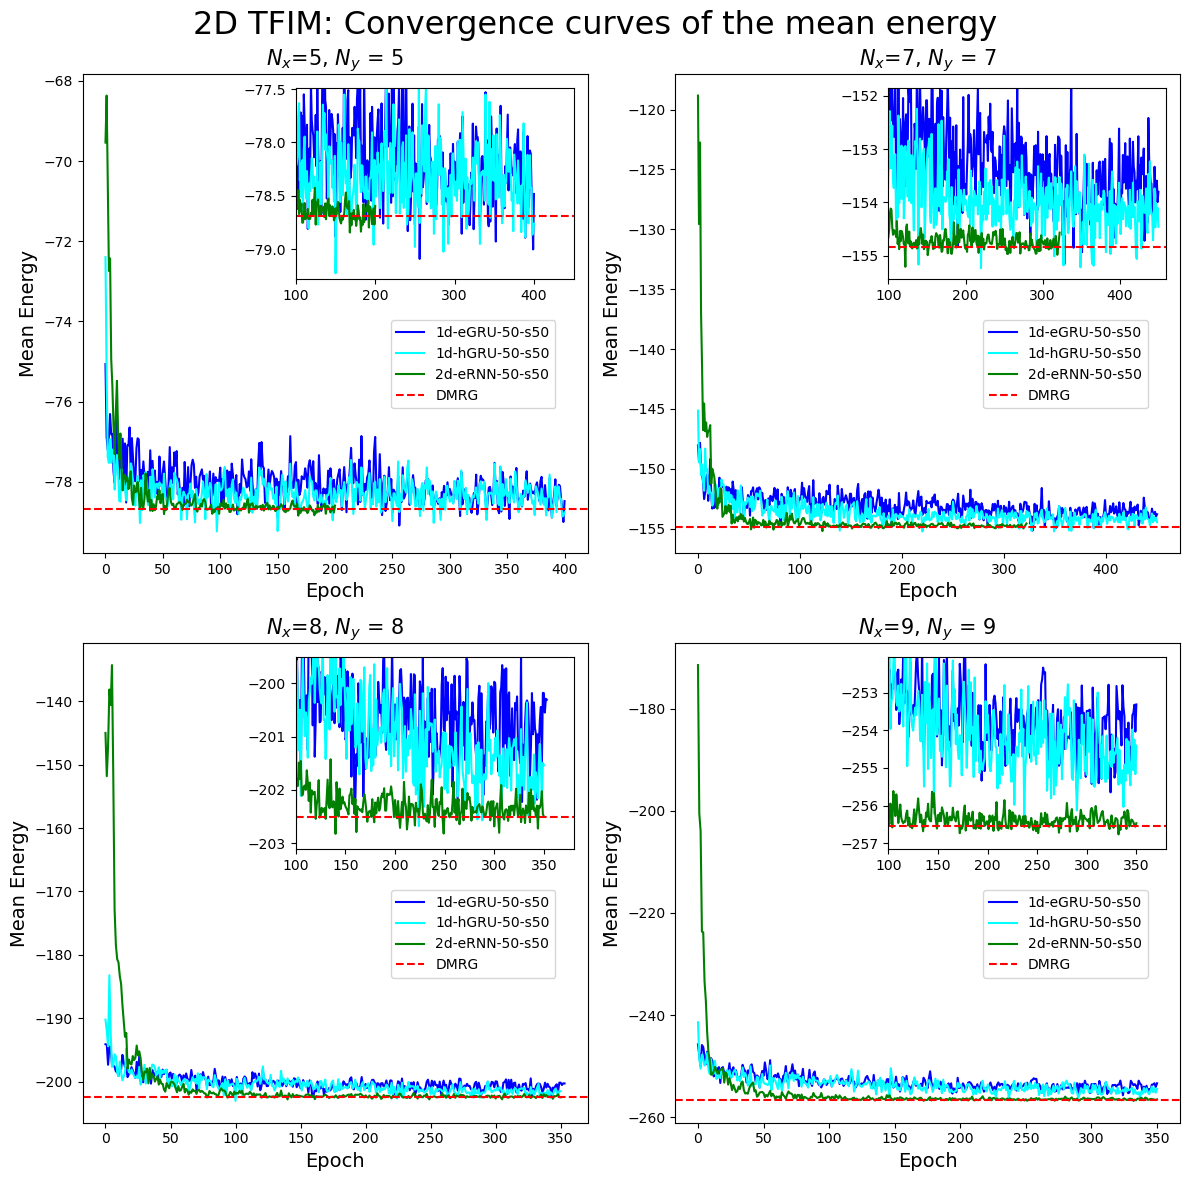

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list55 = [mE_egru_55,  mE_hgru_55, mE_e2gru_55]
e_list77 = [mE_egru_77,  mE_hgru_77, mE_e2gru_77]
e_list88 = [mE_egru_88,  mE_hgru_88, mE_e2gru_88]
e_list99 = [mE_egru_99,  mE_hgru_99, mE_e2gru_99]

e_names = ['1d-eGRU-50-s50', '1d-hGRU-50-s50', '2d-eRNN-50-s50']
plot_res_meanE(ax[0,0], E_55, e_list55, e_names, [5,5], [100,450, E_55-0.6, E_55+1.2], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[0,1], E_77, e_list77, e_names, [7,7], [100,460, E_77-0.6, E_77+3.0], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,0], E_88, e_list88, e_names, [8,8], [100,380, E_88-0.6, E_88+3.0], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1,1], E_99, e_list99, e_names, [9,9], [100,380, E_99-0.6, E_99+4.5], (0.15, 0.3, 0.8, 0.2))


plt.suptitle('2D TFIM: Convergence curves of the mean energy', fontsize = 23)
plt.savefig('2dTFIM_all_N_ns50_nu50.png')

/var/folders/vj/tcj17zdj6tj91hbjgpptsj680000gn/T/ipykernel_1156/1821940846.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('2dTFIM_all_N_ns50_nu50_var.png')


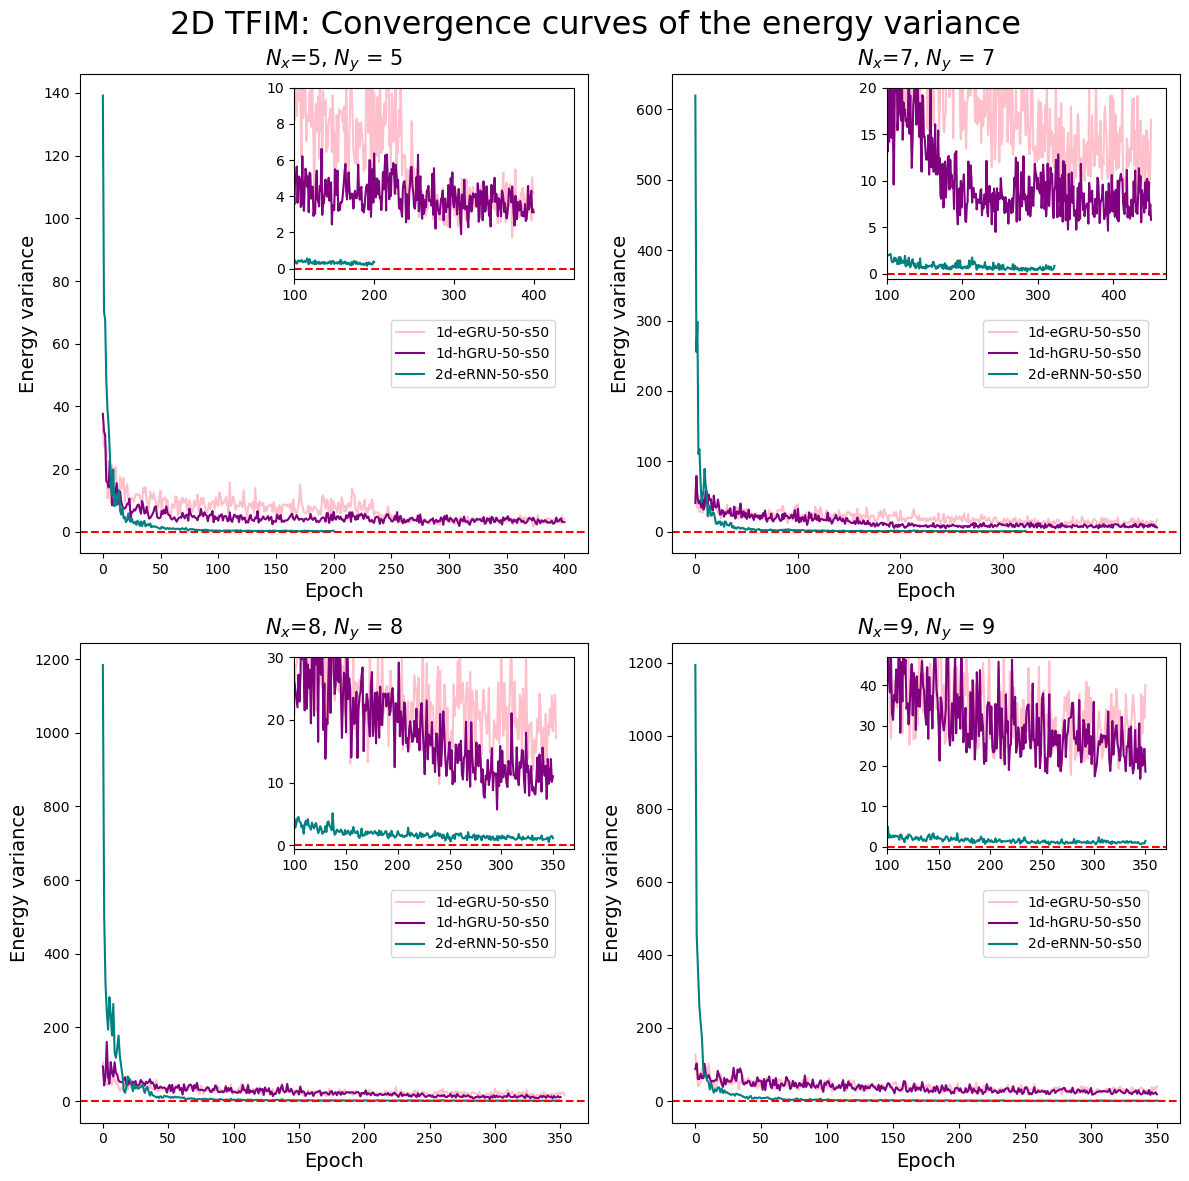

In [6]:
fig, ax = plt.subplots(2,2, figsize=(12, 12), tight_layout=True)
e_list55 = [vE_egru_55,  vE_hgru_55, vE_e2gru_55]
e_list77 = [vE_egru_77,  vE_hgru_77, vE_e2gru_77]
e_list88 = [vE_egru_88,  vE_hgru_88, vE_e2gru_88]
e_list99 = [vE_egru_99,  vE_hgru_99, vE_e2gru_99]

e_names = ['1d-eGRU-50-s50', '1d-hGRU-50-s50', '2d-eRNN-50-s50']
plot_res_var(ax[0,0], e_list55, e_names, [5,5], [100,450, -0.6, 10.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[0,1], e_list77, e_names, [7,7], [100,470, -0.6, 20.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,0], e_list88, e_names, [8,8], [100,370, -0.6, 30.0], (0.15, 0.3, 0.8, 0.2))
plot_res_var(ax[1,1], e_list99, e_names, [9,9], [100,370, -0.6, 47.0], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('2D TFIM: Convergence curves of the energy variance', fontsize = 23)
plt.savefig('2dTFIM_all_N_ns50_nu50_var.png')